# Project 3 - Supervised learning 
## Cars

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [2]:
# Read the data mpg

mpg = pd.read_csv("C:/Users/Gladys/Documents/1.Data Science Course/14. Class 14 - Project 3/data/mpg.csv")

In [3]:
# Preview the first ten rows of the DataFrame.

mpg.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,compact


## Variables and description

| Variable| Type |Description |
|---------|------|------------|
|manufacturer| multi-valued discrete | Vehicle manufacturer
|model|  multi-valued discrete | Model of the vehicle
|displ| continuous| Size of engine (litres)
|year| multi-valued discrete| Year of vehicle manufacture
|cyl| multi-valued discrete| Number of ignition cylinders
|trans| multi-valued discrete| Transmission type (manual or automatic)
|drv| multi-valued discrete| Driven wheels (f=front, 4= 4-wheel,r=rear wheel drive)
|cty| continuous|Miles per gallon, city driving conditions(fuel economy)
|hwy| continuous|Miles per gallon, highway driving conditions
|class| multi-valued discrete|Vehicle class(suv, compact, etc)


In [13]:
#Randomly look at 10 rows 
mpg.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,class
182,toyota,camry,2.4,2008,4,auto(l5),f,21,31,midsize
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,compact
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,minivan
53,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,pickup
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,compact
120,hyundai,tiburon,2.7,2008,6,manual(m6),f,16,24,subcompact
17,audi,a6 quattro,4.2,2008,8,auto(s6),4,16,23,midsize
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,compact
213,volkswagen,jetta,2.0,1999,4,manual(m5),f,21,29,compact
112,hyundai,sonata,2.5,1999,6,auto(l4),f,18,26,midsize


In [14]:
# Use the .rename() method to rename columns for better understanding.
mpg.rename(columns={"displ":"engine_size_litres","drv":"driven_wheels","cty":"city_mpg","hwy":"highway_mpg","cyl":"cylinders"}, inplace=True)
mpg.head(10)

,manufacturer,model,engine_size_litres,year,cylinders,trans,driven_wheels,city_mpg,highway_mpg,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,compact


In [15]:
#Check Null information and data type
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   manufacturer        234 non-null    object 
 1   model               234 non-null    object 
 2   engine_size_litres  234 non-null    float64
 3   year                234 non-null    int64  
 4   cylinders           234 non-null    int64  
 5   trans               234 non-null    object 
 6   driven_wheels       234 non-null    object 
 7   city_mpg            234 non-null    int64  
 8   highway_mpg         234 non-null    int64  
 9   class               234 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 18.4+ KB


In [17]:
#Check rows and columns
mpg.shape

(234, 10)

In [24]:
#Change driven_wheels column to dummies 
dw_dummies = pd.get_dummies(mpg["driven_wheels"], prefix="dw")

In [25]:
#Check DataFrame of dummies
dw_dummies.head(10)

,dw_4,dw_f,dw_r
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,1,0,0


In [26]:
#Drop first column since we don't need it, can be inferred. 
#I decided to drop the first one just because it is the first one but after I read:
#"it is best to have your baseline be the category that has the largest representation".
#So, I should have done a sum() before to drop in order to know wich one was the largest. 
dw_dummies.drop(columns=["dw_4"], inplace= True)

In [27]:
#Concatenate the original DataFrame and the dummy DataFrame
mpg_dummies = pd.concat([mpg, dw_dummies], axis=1)

# Print five random rows.
mpg_dummies.sample(5)

,manufacturer,model,engine_size_litres,year,cylinders,trans,driven_wheels,city_mpg,highway_mpg,class,dw_f,dw_r
164,subaru,forester awd,2.5,2008,4,auto(l4),4,18,23,suv,0,0
91,ford,mustang,3.8,1999,6,auto(l4),r,18,25,subcompact,0,1
13,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,compact,0,0
90,ford,mustang,3.8,1999,6,manual(m5),r,18,26,subcompact,0,1
166,subaru,impreza awd,2.2,1999,4,manual(m5),4,19,26,subcompact,0,0


In [35]:
#Create dummies for trans column to 0 = manual 1=auto

mpg_dummies.trans = mpg_dummies.trans.apply(lambda x: 1 if 'auto' in x else 0)

In [36]:
mpg_dummies.head(10)

,manufacturer,model,engine_size_litres,year,cylinders,trans,driven_wheels,city_mpg,highway_mpg,class,dw_f,dw_r
0,audi,a4,1.8,1999,4,1,f,18,29,compact,1,0
1,audi,a4,1.8,1999,4,0,f,21,29,compact,1,0
2,audi,a4,2.0,2008,4,0,f,20,31,compact,1,0
3,audi,a4,2.0,2008,4,1,f,21,30,compact,1,0
4,audi,a4,2.8,1999,6,1,f,16,26,compact,1,0
5,audi,a4,2.8,1999,6,0,f,18,26,compact,1,0
6,audi,a4,3.1,2008,6,1,f,18,27,compact,1,0
7,audi,a4 quattro,1.8,1999,4,0,4,18,26,compact,0,0
8,audi,a4 quattro,1.8,1999,4,1,4,16,25,compact,0,0
9,audi,a4 quattro,2.0,2008,4,0,4,20,28,compact,0,0


In [37]:
 #Add a new column 

mpg_dummies["years_old"]= 2022-mpg_dummies["year"]
mpg_dummies.head(10)

,manufacturer,model,engine_size_litres,year,cylinders,trans,driven_wheels,city_mpg,highway_mpg,class,dw_f,dw_r,years_old
0,audi,a4,1.8,1999,4,1,f,18,29,compact,1,0,23
1,audi,a4,1.8,1999,4,0,f,21,29,compact,1,0,23
2,audi,a4,2.0,2008,4,0,f,20,31,compact,1,0,14
3,audi,a4,2.0,2008,4,1,f,21,30,compact,1,0,14
4,audi,a4,2.8,1999,6,1,f,16,26,compact,1,0,23
5,audi,a4,2.8,1999,6,0,f,18,26,compact,1,0,23
6,audi,a4,3.1,2008,6,1,f,18,27,compact,1,0,14
7,audi,a4 quattro,1.8,1999,4,0,4,18,26,compact,0,0,23
8,audi,a4 quattro,1.8,1999,4,1,4,16,25,compact,0,0,23
9,audi,a4 quattro,2.0,2008,4,0,4,20,28,compact,0,0,14


In [38]:
#Final table for work after all the changes I've made.

mpg_final= mpg_dummies[["engine_size_litres", "cylinders", "trans","dw_f","dw_r","years_old","city_mpg","highway_mpg"]].copy()
mpg_final.head(10)

,engine_size_litres,cylinders,trans,dw_f,dw_r,years_old,city_mpg,highway_mpg
0,1.8,4,1,1,0,23,18,29
1,1.8,4,0,1,0,23,21,29
2,2.0,4,0,1,0,14,20,31
3,2.0,4,1,1,0,14,21,30
4,2.8,6,1,1,0,23,16,26
5,2.8,6,0,1,0,23,18,26
6,3.1,6,1,1,0,14,18,27
7,1.8,4,0,0,0,23,18,26
8,1.8,4,1,0,0,23,16,25
9,2.0,4,0,0,0,14,20,28


In [41]:
# Describe the data

mpg_final.describe()

,engine_size_litres,cylinders,trans,dw_f,dw_r,years_old,city_mpg,highway_mpg
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,5.888889,0.670940,0.452991,0.106838,18.500000,16.858974,23.440171
std,1.291959,1.611534,0.470879,0.498852,0.309569,4.509646,4.255946,5.954643
min,1.600000,4.000000,0.000000,0.000000,0.000000,14.000000,9.000000,12.000000
25%,2.400000,4.000000,0.000000,0.000000,0.000000,14.000000,14.000000,18.000000
50%,3.300000,6.000000,1.000000,0.000000,0.000000,18.500000,17.000000,24.000000
75%,4.600000,8.000000,1.000000,1.000000,0.000000,23.000000,19.000000,27.000000
max,7.000000,8.000000,1.000000,1.000000,1.000000,23.000000,35.000000,44.000000


In [44]:
# Correlation matrix
mpg_final.corr()

,engine_size_litres,cylinders,trans,dw_f,dw_r,years_old,city_mpg,highway_mpg
engine_size_litres,1.000000,0.930227,0.274632,-0.644681,0.457193,-0.147843,-0.798524,-0.766020
cylinders,0.930227,1.000000,0.279649,-0.567085,0.385221,-0.122245,-0.805771,-0.761912
trans,0.274632,0.279649,1.000000,-0.111812,0.006669,-0.081855,-0.299522,-0.275683
dw_f,-0.644681,-0.567085,-0.111812,1.000000,-0.314735,0.068680,0.666995,0.722908
dw_r,0.457193,0.385221,0.006669,-0.314735,1.000000,-0.041503,-0.226316,-0.142034
years_old,-0.147843,-0.122245,-0.081855,0.068680,-0.041503,1.000000,0.037232,-0.002158
city_mpg,-0.798524,-0.805771,-0.299522,0.666995,-0.226316,0.037232,1.000000,0.955916
highway_mpg,-0.766020,-0.761912,-0.275683,0.722908,-0.142034,-0.002158,0.955916,1.000000


<AxesSubplot:>

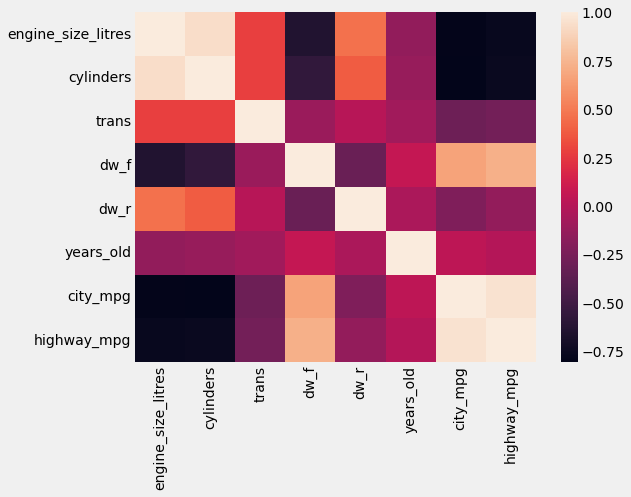

In [45]:
# Visualize correlation matrix in Seaborn using a heat map.

sns.heatmap(mpg_final.corr())

##### With the informatiom above I can tell :
- engine_size_litres and cylinders have a strong correlation between them since the heatmap is almost white and the correlation matrix shows a coeficient of 0.93 so I won't use them together in the model. Also, I can tell that std is slighlty higher for cylinders (1.61 vs 1.29) but the correlation with the output variable city_mpg is higher as well.
- I can not infer any information from dummies variables
- Years_old have a high std and It doesn't have much correlation with the output variables so I won't take it into account.


### For modelling city_mpg I use Cross-validation because is the gold standard for estimating accuracy across models.I will use different input variables to see wich ones works better.  


In [46]:
mpg_final.head(10)

,engine_size_litres,cylinders,trans,dw_f,dw_r,years_old,city_mpg,highway_mpg
0,1.8,4,1,1,0,23,18,29
1,1.8,4,0,1,0,23,21,29
2,2.0,4,0,1,0,14,20,31
3,2.0,4,1,1,0,14,21,30
4,2.8,6,1,1,0,23,16,26
5,2.8,6,0,1,0,23,18,26
6,3.1,6,1,1,0,14,18,27
7,1.8,4,0,0,0,23,18,26
8,1.8,4,1,0,0,23,16,25
9,2.0,4,0,0,0,14,20,28


In [47]:
#Model 1
# Variables engine_size_litres, trans, dw_f, dw_r
# Create a DataFrame for both parts of data

X1 = mpg_final[["engine_size_litres", "trans", "dw_f", "dw_r"]]
Y = mpg_final[["city_mpg"]]

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y,test_size=0.2)

sc = StandardScaler()

X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [58]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr1 = LinearRegression()

kf1= KFold(n_splits=5) 

print("Getting R2")
print((cross_val_score(lr1, X1_train, y1_train, cv=kf1)))
print(np.mean(cross_val_score(lr1, X1_train, y1_train, cv=kf1)))


print("Getting MSE")
print((-cross_val_score(lr1, X1_train, y1_train, cv=kf1, scoring="neg_mean_squared_error")))
print(np.mean(-cross_val_score(lr1, X1_train, y1_train, cv=kf1, scoring="neg_mean_squared_error")))

print("Getting RMSE")
print((np.sqrt(-cross_val_score(lr1, X1_train, y1_train, cv=kf1, scoring="neg_mean_squared_error"))))
print(np.mean(np.sqrt(-cross_val_score(lr1, X1_train, y1_train, cv=kf1, scoring="neg_mean_squared_error")))) 

Getting R2
[0.68450635 0.70013452 0.76485902 0.71147859 0.6081218 ]
0.6938200565243202
Getting MSE
[6.27928489 3.90925733 4.35173993 3.79946241 9.09191771]
5.486332453502371
Getting RMSE
[2.50585013 1.97718419 2.08608244 1.94922097 3.0152807 ]
2.3067236876126147


In [50]:
#Model 2
# Variables engine_size_litres, trans
# Create a DataFrame for both parts of data

X2 = mpg_final[["engine_size_litres", "trans"]]
Y = mpg_final[["city_mpg"]]

lr2 = LinearRegression()

kf2= KFold(n_splits=5) 

print("Getting R2")
print((cross_val_score(lr2, X2, Y, cv=kf2)))
print(np.mean(cross_val_score(lr2, X2, Y, cv=kf2)))


print("Getting MSE")
print((-cross_val_score(lr2, X2, Y, cv=kf2, scoring="neg_mean_squared_error")))
print(np.mean(-cross_val_score(lr2, X2, Y, cv=kf2, scoring="neg_mean_squared_error")))

print("Getting RMSE")
print((np.sqrt(-cross_val_score(lr2, X2, Y, cv=kf2, scoring="neg_mean_squared_error"))))
print(np.mean(np.sqrt(-cross_val_score(lr2, X2, Y, cv=kf2, scoring="neg_mean_squared_error")))) 

Getting R2
[-0.6697022  -0.18356657  0.77187245  0.44878709  0.34007413]
0.14149298204461516
Getting MSE
[11.3198099   5.18647549  5.04214547  3.33722115 14.61598569]
7.900327541039649
Getting RMSE
[3.36449252 2.27738348 2.24547221 1.82680627 3.82308589]
2.7074480729493375


In [51]:
#Model 3
# Variables engine_size_litres, dw_f, dw_r
# Create a DataFrame for both parts of data

X3 = mpg_final[["engine_size_litres", "dw_f", "dw_r"]]
Y = mpg_final[["city_mpg"]]

lr3 = LinearRegression()

kf3= KFold(n_splits=5) 

print("Getting R2")
print((cross_val_score(lr3, X3, Y, cv=kf3)))
print(np.mean(cross_val_score(lr3, X3, Y, cv=kf3)))


print("Getting MSE")
print((-cross_val_score(lr3, X3, Y, cv=kf3, scoring="neg_mean_squared_error")))
print(np.mean(-cross_val_score(lr3, X3, Y, cv=kf3, scoring="neg_mean_squared_error")))

print("Getting RMSE")
print((np.sqrt(-cross_val_score(lr3, X3, Y, cv=kf3, scoring="neg_mean_squared_error"))))
print(np.mean(np.sqrt(-cross_val_score(lr3, X3, Y, cv=kf3, scoring="neg_mean_squared_error")))) 

Getting R2
[-0.19556492  0.35256306  0.78650485  0.62702183  0.41730295]
0.397565553279719
Getting MSE
[ 8.10537813  2.83711617  4.71873571  2.25813039 12.90552797]
6.164977672090637
Getting RMSE
[2.84699458 1.68437412 2.17226511 1.50270769 3.59242647]
2.359753592909475


In [52]:
#Model 4
# Variables cylinders,trans, dw_f, dw_r
# Create a DataFrame for both parts of data

X4 = mpg_final[["cylinders", "trans", "dw_f", "dw_r"]]
Y = mpg_final[["city_mpg"]]

lr4 = LinearRegression()

kf4= KFold(n_splits=5) 

print("Getting R2")
print((cross_val_score(lr4, X4, Y, cv=kf4)))
print(np.mean(cross_val_score(lr4, X4, Y, cv=kf4)))


print("Getting MSE")
print((-cross_val_score(lr4, X4, Y, cv=kf4, scoring="neg_mean_squared_error")))
print(np.mean(-cross_val_score(lr4, X4, Y, cv=kf4, scoring="neg_mean_squared_error")))

print("Getting RMSE")
print((np.sqrt(-cross_val_score(lr4, X4, Y, cv=kf4, scoring="neg_mean_squared_error"))))
print(np.mean(np.sqrt(-cross_val_score(lr4, X4, Y, cv=kf4, scoring="neg_mean_squared_error")))) 

Getting R2
[0.2797465  0.41324914 0.79190827 0.71813425 0.43833025]
0.5282736811450792
Getting MSE
[ 4.88298617  2.57118532  4.59930759  1.70650635 12.43981709]
5.239960502829609
Getting RMSE
[2.20974799 1.6034916  2.14459964 1.30633317 3.52701249]
2.1582369761228763


In [53]:
#Model 5
# Variables cylinders,trans
# Create a DataFrame for both parts of data

X5 = mpg_final[["cylinders", "trans"]]
Y = mpg_final[["city_mpg"]]

lr5 = LinearRegression()

kf5= KFold(n_splits=5) 

print("Getting R2")
print((cross_val_score(lr5, X5, Y, cv=kf5)))
print(np.mean(cross_val_score(lr5, X5, Y, cv=kf5)))


print("Getting MSE")
print((-cross_val_score(lr5, X5, Y, cv=kf5, scoring="neg_mean_squared_error")))
print(np.mean(-cross_val_score(lr5, X5, Y, cv=kf5, scoring="neg_mean_squared_error")))

print("Getting RMSE")
print((np.sqrt(-cross_val_score(lr5, X5, Y, cv=kf5, scoring="neg_mean_squared_error"))))
print(np.mean(np.sqrt(-cross_val_score(lr5, X5, Y, cv=kf5, scoring="neg_mean_squared_error")))) 

Getting R2
[ 0.35791089 -0.10285607  0.74714166  0.1740562   0.29487186]
0.29422490822434566
Getting MSE
[ 4.35306766  4.83279618  5.5887532   5.0005307  15.61712208]
7.07845396573328
Getting RMSE
[2.08640065 2.19836216 2.3640544  2.23618664 3.95185046]
2.5673708621893807


In [54]:
#Model 6
# Variables cylinders,dw_f, dw_r
# Create a DataFrame for both parts of data

X6 = mpg_final[["cylinders", "dw_f", "dw_r"]]
Y = mpg_final[["city_mpg"]]

lr6 = LinearRegression()

kf6= KFold(n_splits=5) 

print("Getting R2")
print((cross_val_score(lr6, X6, Y, cv=kf6)))
print(np.mean(cross_val_score(lr6, X6, Y, cv=kf6)))


print("Getting MSE")
print((-cross_val_score(lr6, X6, Y, cv=kf6, scoring="neg_mean_squared_error")))
print(np.mean(-cross_val_score(lr6, X6, Y, cv=kf6, scoring="neg_mean_squared_error")))

print("Getting RMSE")
print((np.sqrt(-cross_val_score(lr6, X6, Y, cv=kf6, scoring="neg_mean_squared_error"))))
print(np.mean(np.sqrt(-cross_val_score(lr6, X6, Y, cv=kf6, scoring="neg_mean_squared_error")))) 

Getting R2
[0.22724297 0.43235078 0.79150788 0.74470787 0.42362165]
0.5238862295328057
Getting MSE
[ 5.23893581  2.48748051  4.60815724  1.54562107 12.76558204]
5.329155335816672
Getting RMSE
[2.28887217 1.57717485 2.14666188 1.2432301  3.57289547]
2.165766894232495


### The best model is numer 4 with the highest R2 = 0.79190827, MSE= 4.59930759 and RMSE= 2.14459964 in the 3rd train-test- split

In [55]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(lr4, X4, Y, cv= kf4, return_estimator=True)

for model in cv_results["estimator"]:
    print(model.intercept_)
    print(model.coef_)   

[25.66037352]
[[-1.7154961  -0.45292366  3.38763755  1.51727982]]
[26.11161798]
[[-1.69204345 -0.88154626  2.6859554   1.84576043]]
[25.75970625]
[[-1.67854761 -0.82869926  2.86280546  1.81667526]]
[26.20736046]
[[-1.72619258 -0.94300287  2.77064904  1.77104047]]
[25.51122208]
[[-1.6441111  -0.60403479  2.41539045  1.60629486]]


### Y = 25.75970625 - 1.67854761 * b0 - 0.82869926 * b1 +  2.86280546 * b2 + 1.81667526 * b3

The model shows how much the total mpg change if any of the input variables change i.e if we get 1 more cylinder(b0) the mpg decrease in 1.6. The minimun mpg is 25.7597